<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-coloring-book/blob/master/main_coloring_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Interactiv Coloring Book**


![alt text](https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/coloring_book_picture.png)

**Group Members**
* Johannes Scheibe
* Thilo von Glan 
* Jill Baumann

## **Main goal**
"Create a coloring template out of a photo"

**Scenarios**
* embarrassingly colorbookly pictures
* blurred images
* high detailled images
* existing images from coloring books
* faces

**Possible User interface**
* upload the picture
* download the result
* adjust settings to get different results




**Steps**

0.   Accusation of Pictures 80%

*   We have now made some "easy to colorbook" pictures ourselves, still more could be made and "embarrassingly colorbookly" pictures from the internet may be acquired if need be.

1.   Preprocessing of picture 65%

*   We have already tried out differnt methods and decided for these:
  * Gaussian Blur
  * Contrast
  * Color Quantization
  * Color Detection with HSV
*   We still have to decide on which filters are going to be important for the image segmantation and we should rewrite them to let all function like seperatly callable funtions to be able to try or use differnt filters in quick succesion - maybe even in the final product.


2.   Image Segmantation 70%

*   We have succesfully implemented our own form of the SLIC algorithim and also well working color quantization to segment pictures. They may yet be tuned and we have to decide how we want to implement their usage. That is because their effevtiveness varies quite a bit depending on the picture. So the options here are:
  * Decide on one even if the results may be worse sometimes
  * Improve the quality of one, so that it is always better or use different methods on different parts of the picture
  * Give the User the option to choose the method of segmentation ad-hocor or do both and let the user pick in the end
  * Automaticly choose the best method for the picture

3.   Postprocessing 60%

*   We have implemented a form of the SLIC algorithm for edge drawing and have also used other methods quite succesfully already:
  * Edge Detection
  * Canny
  * Adaptive Thresholding

4.   Extracting Colors and assigning correct numbers to fields 30%

*   We have already succesfully reduced the amount of colors to a range of 15 different colors in a picture, so the first of these three steps is essentially done, the others we haven't really looked at yet.
  * Color standartization
  * Color detection, for each segment
  * Drawing numbers fittingly



**Next Steps**
* Face Detection

# **Loading of all Images**

In [0]:
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-Liverpool.png
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-FC_Valencia.png
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/car.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/clock.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/cup.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/doctor.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/bus.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/lego.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/penguin.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/soccer.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/face1.JPG
! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/face2.JPG

--2019-11-19 19:14:02--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-Liverpool.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78308 (76K) [image/png]
Saving to: ‘Badge-Liverpool.png.10’

Badge-Liverpool.png 100%[===================>]  76.47K  --.-KB/s    in 0.008s  

2019-11-19 19:14:02 (9.55 MB/s) - ‘Badge-Liverpool.png.10’ saved [78308/78308]

--2019-11-19 19:14:04--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-FC_Valencia.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connecte

In [0]:
import matplotlib.pyplot as plt
import cv2

img1 = cv2.imread("Badge-Liverpool.png")
img2 = cv2.imread("Badge-FC_Valencia.png")
img3 = cv2.imread("car.JPG")
img4 = cv2.imread("cup.JPG")
img5 = cv2.imread("doctor.JPG")
img6 = cv2.imread("lego.JPG")
img7 = cv2.imread("Board-Game.jpeg")
img8 = cv2.imread("penguin.JPG")
img9 = cv2.imread("soccer.JPG")
img10 = cv2.imread("clock.JPG")
img11 = cv2.imread("bus.JPG")
img12 = cv2.imread("face1.JPG")
img13 = cv2.imread("face2.JPG")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)
img8 = cv2.cvtColor(img8, cv2.COLOR_BGR2RGB)
img9 = cv2.cvtColor(img9, cv2.COLOR_BGR2RGB)
img10 = cv2.cvtColor(img10, cv2.COLOR_BGR2RGB)
img11 = cv2.cvtColor(img11, cv2.COLOR_BGR2RGB)
img12 = cv2.cvtColor(img12, cv2.COLOR_BGR2RGB)
img13 = cv2.cvtColor(img13, cv2.COLOR_BGR2RGB)


<function matplotlib.pyplot.show>

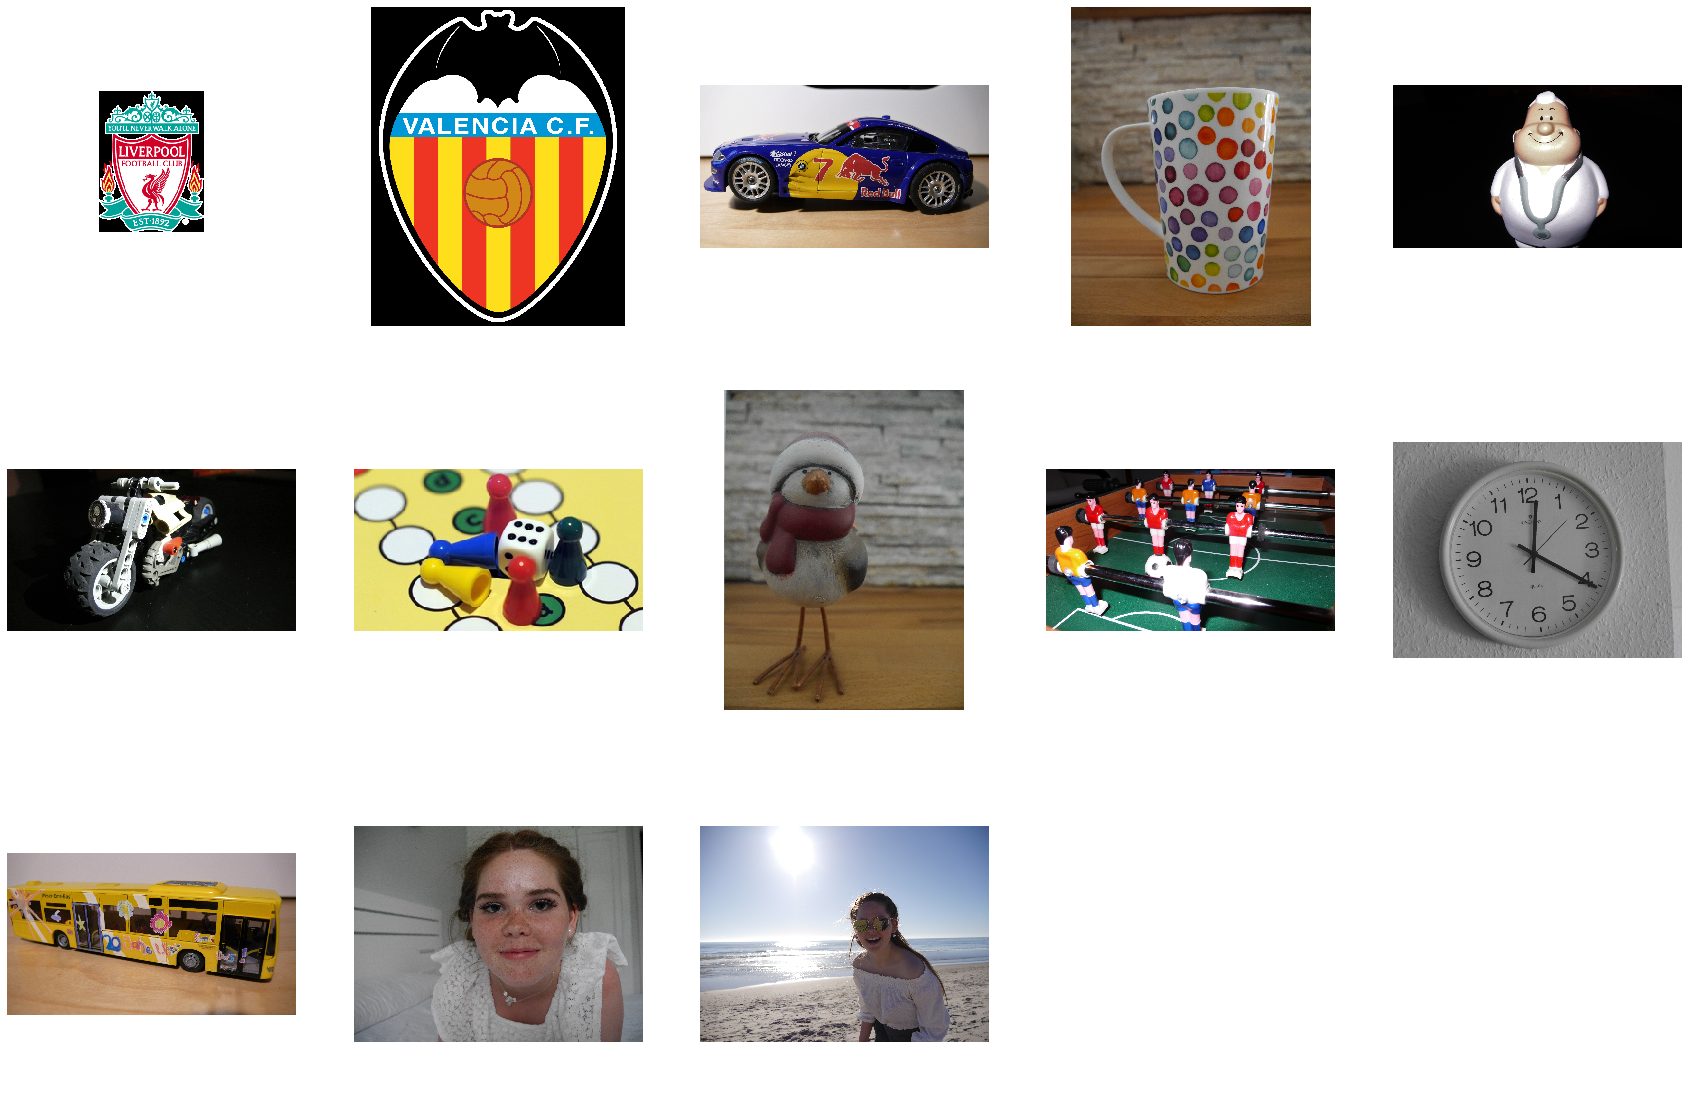

In [0]:
fig, axs = plt.subplots(3,5)
axs[0,0].imshow(img1)
axs[0,1].imshow(img2)
axs[0,2].imshow(img3)
axs[0,3].imshow(img4)
axs[0,4].imshow(img5)
axs[1,0].imshow(img6)
axs[1,1].imshow(img7)
axs[1,2].imshow(img8)
axs[1,3].imshow(img9)
axs[1,4].imshow(img10)
axs[2,0].imshow(img11)
axs[2,1].imshow(img12)
axs[2,2].imshow(img13)
[axi.set_axis_off() for axi in axs.ravel()]
fig_size = [30,20]
plt.rcParams["figure.figsize"] = fig_size
plt.show

# **Color set**



*   Red: RGB: 255,0,0 HSV: 0,100,100
*   Yellow: RGB: 255,255,0 HSV: 60,100,100
*   Green: RGB: 0,255,0 HSV: 120,100,100
*   Blue: RGB: 0,0,255 HSV: 240,100,100
*   Pink: RGB: 255,0,255 HSV: 300,100,100
*   Purple: RGB: 200,0,255 HSV: 287,100,100
*   Light blue: RGB: 191,239,255 HSV: 195,25,100
*   Dark blue RGB: 25,25,112 HSV: 240,78,44
*   Dark Green: RGB: 0,99,0 HSV: 120,100,39
*   Skin: RGB: 255,229,196 HSV: 33,23,100
*   Brown: RGB: 140,92,43 HSV: 30,69,55
*   Light brown: RGB: 222,184,135 HSV: 33,39,87
*   Dark red: RGB: 140,0,0 HSV: 0,100,55
*   Gray: RGB: 204,204,204 HSV: 0,0,80
*   White: RGB: 255,255,255 HSV: 0,0,100
*   Black: RGB: 0,0,0 HSV: 0,0,0


In [0]:
color_set_hsv = [[0,255,255],
             [60,255,255],
             [120,255,255],
             [240,255,255],
             [300,255,255],
             [287,255,255],
             [195,64,255],
             [240,199,112],
             [120,255,100],
             [33,59,255],
             [30,176,140],
             [33,100,222],
             [0,255,140],
             [0,0,204],
             [0,0,255],
             [0,0,0]]

In [0]:
color_set_rgb = [[255,0,0],
             [255,255,0],
             [0,255,0],
             [0,0,255],
             [255,0,255],
             [200,0,255],
             [191,239,255],
             [25,25,112],
             [0,99,0],
             [225,229,196],
             [140,92,43],
             [222,184,135],
             [140,0,0],
             [204,204,204],
             [255,255,255],
             [0,0,0]]

# **Preprocessing functions**

In [0]:
# A single Image is loaded into colab and returned (name)
def loadImage(name):
  link = "https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/" + name
  ! wget $link
  
  img = cv2.imread(name)
  rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return rgb

# returns an image into grayscale
def gray (img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return gray

# GaussianBlur(src, Size(i, i), deviation in X direction)
def gaussianBlur(img, a, b, x):
  blur = cv2.GaussianBlur(img, (a, b), x)
  return blur

# **Image Segmantation functions**


**Color quantization**

In [0]:
# Color quantization using k-means Clustering
# kmeans(samples, nclusters, criteria, attemps, flags)
# samples Z: Input of np.float32 data type
# nclusters K: number of clusters/ colors
# criteria: iteration termination criteria
#   (termination criteria, max_iter, epsilon)
# attemps: number of iterations - returns best result from the diffrent iterations
# flag: specifies how initial centers are choosen
# Code source: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html
def color_quantization(img):
  Z = img.reshape((-1,3))

  # convert to np.float32
  Z = np.float32(Z)

  # define criteria, number of clusters(K) and apply kmeans()
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 4
  ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

  # Now convert back into uint8, and make original image
  center = np.uint8(center)
  res = center[label.flatten()]
  res2 = res.reshape((statue.shape))
  return res2

**Slic**

Based on: https://github.com/darshitajain/SLIC

In [0]:
# function which returns an object of class SuperPixel(height, weidth, l, a, b). Superpixels have a center(h,w) and a color(lab)
def make_superPixel(h, w,img):
    return SuperPixels(h, w,img[h,w][0],img[h,w][1],img[h,w][2])

In [0]:
# To define the initial cluster centers distanced at S
def initial_cluster_center(S,img,img_h,img_w,clusters):
    h = S // 2
    w = S // 2
    while h < img_h:
        while w < img_w:
            clusters.append(make_superPixel(h, w,img))
            w += S
        w = S // 2
        h += S
    return clusters

In [0]:
# function to calculate gradient at each pixel.
def calc_gradient(h, w,img,img_w,img_h):
    if w + 1 >= img_w:
        w = img_w - 2
    if h + 1 >= img_h:
        h = img_h - 2
    grad = img[w + 1, h + 1][0] - img[w, h][0] + img[w + 1, h + 1][1] - img[w, h][1] + img[w + 1, h + 1][2] - img[w, h][2]
    return grad

In [0]:
# function which reassign for each cluster the cluster center to the pixel having the lowest gradient
def reassign_cluster_center_acc_to_grad(clusters,img):
    for c in clusters:
        cluster_gradient = calc_gradient(c.h, c.w,img,img_w,img_h)
        for dh in range(-1, 2):
            for dw in range(-1, 2):
                H = c.h + dh
                W = c.w + dw
                new_gradient = calc_gradient(H,W, img,img_w,img_h)
                if new_gradient < cluster_gradient:
                    c.update(H, W,img[H,W][0], img[H,W][1],img[H,W][2])
                    c_gradient = new_gradient


In [0]:
#function to assign pixels to the nearest cluster using the Euclidean distance involving both color and spatial proximity.

def assign_pixels_to_cluster(clusters,S,img,img_h,img_w,tag,dis):
    for c in clusters:
        for h in range(c.h - 2 * S, c.h + 2 * S):
            if h < 0 or h >= img_h: continue
            for w in range(c.w - 2 * S, c.w + 2 * S):
                if w < 0 or w >= img_w: continue
                l, a, b = img[h,w]
                Dc = math.sqrt(math.pow(l - c.l, 2) + math.pow(a - c.a, 2) + math.pow(b - c.b, 2))
                Ds = math.sqrt(math.pow(h - c.h, 2) + math.pow(w - c.w, 2))
                D = math.sqrt(math.pow(Dc / m, 2) + math.pow(Ds /S, 2))
                if D < dis[h,w]:
                    if (h, w) not in tag:
                        tag[(h, w)] = c
                        c.pixels.append((h, w))
                    else:
                        tag[(h, w)].pixels.remove((h, w))
                        tag[(h, w)] = c
                        c.pixels.append((h, w))
                    dis[h, w] = D

In [0]:
# function to replace the cluster center with the mean of the pixels contained in the cluster
def update_cluster_mean(clusters):
    for c in clusters:
        sum_h = sum_w = number = 0
        #print("c.pixels",c.pixels)
        for p in c.pixels:
            sum_h += p[0]
            sum_w += p[1]
            number += 1
            H = sum_h // number
            W = sum_w // number
            c.update(H, W,img[H, W][0], img[H, W][1], img[H, W][2])

In [0]:
# replace the color of each pixel in a cluster by the color of the cluster's center
def avg_color_cluster(img, clusters):
    image = np.copy(img)
    for c in clusters:
        for p in c.pixels:
            image[p[0],p[1]][0] = c.l
            image[p[0],p[1]][1] = c.a
            image[p[0],p[1]][2] = c.b
    return color.lab2rgb(image)

In [0]:
# function to resize and cut the image to (400 x 400)
def resize_image(img):
    h = img.shape[0]
    w = img.shape[1]
    diff = abs(int((h - w)/2))
    if h < w:
      new_w = diff + h
      img = img[0:h, diff:new_w]
    elif h > w:
      new_h = diff + w
      img = img[diff:new_h, 0:w]
    img = resize(img, (400,400),anti_aliasing=True)
    return img

In [0]:
# A class to initialize the super pixels, of the form - [h,y,l,a,b].
class SuperPixels(object):

    def __init__(self, h, w, l=0, a=0, b=0):
        self.update(h, w, l, a, b)
        self.pixels = []

    def update(self, h, w, l, a, b):
        self.h = h
        self.w = w
        self.l = l
        self.a = a
        self.b = b

In [0]:
def slic_run(S,img,img_h,img_w,clusters,tag,dis,iter):
    clusters = initial_cluster_center(S,img,img_h,img_w,clusters)
    reassign_cluster_center_acc_to_grad(clusters,img)
    for i in range(iter): # usually the algortihm converges within 10 iterations
        assign_pixels_to_cluster(clusters,S,img,img_h,img_w,tag,dis)
        update_cluster_mean(clusters)
        if i == (iter - 1) : # to print the output after 10 iterations
            output = avg_color_cluster(img, clusters)
    return clusters, output

In [0]:
def slic(img):
  # input images are resized to (400 x 400) for processing
  resized = resize_image(img)

  # convert RGB to LAB
  img = color.rgb2lab(resized)

  k = 400  # Number of Super pixels
  m = 20    # Constant for normalizing the color proximity, range of m = [1,40]

  img_h = img.shape[0] # Image Height
  img_w = img.shape[1] # Image Width

  N = img_h * img_w  # Total number of pixels in the image
  S = int(math.sqrt(N /k)) # average size of each superpixel

  clusters = []
  tag = {}
  # initialize the distance between pixels and cluster center as infinity
  dis = np.full((img_h, img_w), np.inf)

  clusters,output = slic(S,img,img_h,img_w,clusters,tag,dis,7)
  return output


# **Postprocessing functions - generate colorbook picture**
* Canny
* Adaptive Treshhold

**Canny**

In [0]:
#Canny(image, minVal, maxVal,  L2gradient(initial:False))
#apertureSize = size of Sobel kernel
#L2gradient = True: uses more accurate function

def canny(img, minVal, maxVal, L2gradient):
  canny = cv2.Canny(img, minVal, maxVal, L2gradient)
  return canny

def invert(img):
  inverted = cv2.bitwise_not(img)
  return inverted

**Adaptive Treshold**

In [0]:
#maxValue: Non-zero value assigned to the pixels for which the condition is satisfied
#adativeMethod: ADAPTIVE_TRESH_MEAN_C or ADAPTIVE_TRESH_GAUSSIAN_C
#tresholdType: TRESH_BINARY or TRESH_BINARY_INV
#blockSize: Size of a pixel neighborhood that is used to calculate a threshold value for the pixel
#constant: Constant subtracted from the mean or weighted mean

def adaptiveTreshold(img, maxValue, adaptiveMethod, tresholdType, blockSize, constant):
  adaptive = cv2.adaptiveThreshold(img, maxValue, adaptiveMethod, tresholdType, blockSize, constant)
  return adaptive

# **Testing Playground**

In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

preikestolen = loadImage("preikestolen.jpg")
blur = gaussianBlur(preikestolen, 17, 17, 0)
#canny = canny(preikestolen, 100, 200, True)
#inverted = invert(canny)
adaptive = adaptiveTreshold(preikestolen, 125, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.TRESH_BINARY, 11, 12)

plt.imshow(adaptive)

--2019-11-28 16:57:04--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/preikestolen.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1354462 (1.3M) [image/jpeg]
Saving to: ‘preikestolen.jpg.18’

preikestolen.jpg.18 100%[===================>]   1.29M  --.-KB/s    in 0.02s   

2019-11-28 16:57:04 (53.7 MB/s) - ‘preikestolen.jpg.18’ saved [1354462/1354462]



AttributeError: ignored

# **Edge detection** 



Canny(image, minVal, maxVal,  L2gradient(initial:False))

apertureSize = size of Sobel kernel

L2gradient = True: uses more accurate function

***Example 1: Bladge Liverpool***

--2019-11-19 15:38:54--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-Liverpool.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78308 (76K) [image/png]
Saving to: ‘Badge-Liverpool.png.3’

Badge-Liverpool.png 100%[===================>]  76.47K  --.-KB/s    in 0.008s  

2019-11-19 15:38:54 (9.37 MB/s) - ‘Badge-Liverpool.png.3’ saved [78308/78308]



(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

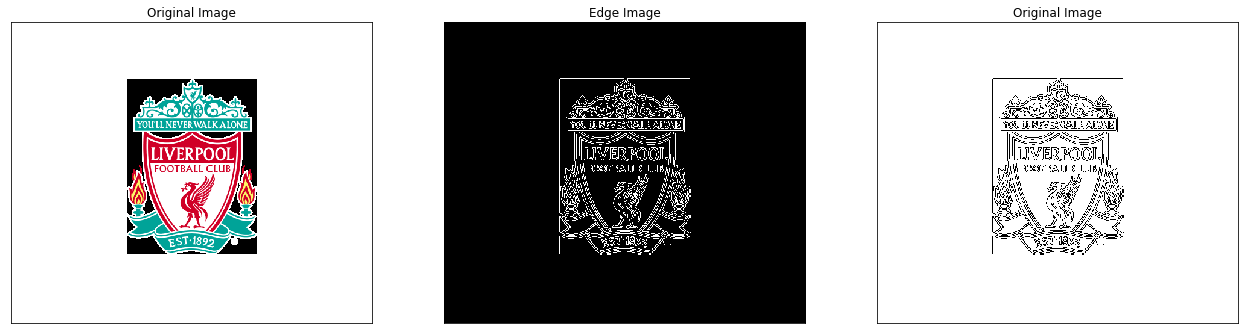

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Badge-Liverpool.png
liverpool = cv2.imread("Badge-Liverpool.png")
liverpool = cv2.cvtColor(liverpool, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(liverpool, 100, 200,   L2gradient = True)
inverted = cv2.bitwise_not(edges)

fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size
plt.subplot(131)
plt.imshow(liverpool,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image')
plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(inverted,cmap = 'gray')
plt.title('Inverted')
plt.xticks([]), plt.yticks([])

***Example 2: Squirrel***

--2019-11-19 15:42:07--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/squirrel.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1023242 (999K) [image/jpeg]
Saving to: ‘squirrel.JPG.3’

squirrel.JPG.3      100%[===================>] 999.26K  --.-KB/s    in 0.03s   

2019-11-19 15:42:07 (38.5 MB/s) - ‘squirrel.JPG.3’ saved [1023242/1023242]



(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

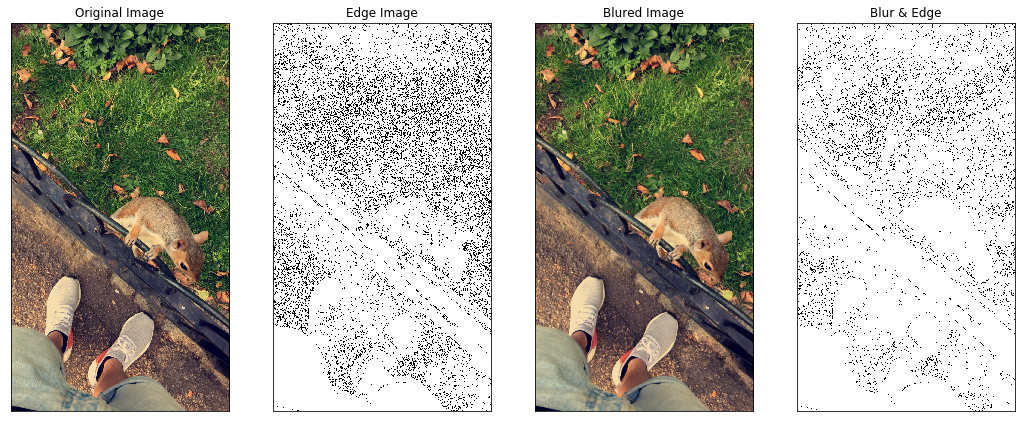

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/squirrel.JPG
squirrel = cv2.imread("squirrel.JPG")
squirrel = cv2.cvtColor(squirrel, cv2.COLOR_BGR2RGB)
edges_1 = cv2.Canny(squirrel, 100, 200, L2gradient = True)
inverted_1 = cv2.bitwise_not(edges_1)
blurred = cv2.GaussianBlur(squirrel, (5, 5), 0)
edges_2 = cv2.Canny(blurred, 100, 200, L2gradient = True)
inverted_2 = cv2.bitwise_not(edges_2)

fig_size = [18,12]
plt.rcParams["figure.figsize"] = fig_size
plt.subplot(141)
plt.imshow(squirrel,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(142)
plt.imshow(inverted_1,cmap = 'gray')
plt.title('Edge Image')
plt.xticks([]), plt.yticks([])
plt.subplot(143)
plt.imshow(blurred,cmap = 'gray')
plt.title('Blured Image')
plt.xticks([]), plt.yticks([])
plt.subplot(144)
plt.imshow(inverted_2,cmap = 'gray')
plt.title('Blur & Edge')
plt.xticks([]), plt.yticks([])

***Example 3: Statue of Liberty***

--2019-11-05 14:42:35--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5581312 (5.3M) [application/octet-stream]
Saving to: ‘P1100010.JPG.5’

P1100010.JPG.5      100%[===================>]   5.32M  --.-KB/s    in 0.07s   

2019-11-05 14:42:35 (77.8 MB/s) - ‘P1100010.JPG.5’ saved [5581312/5581312]



(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

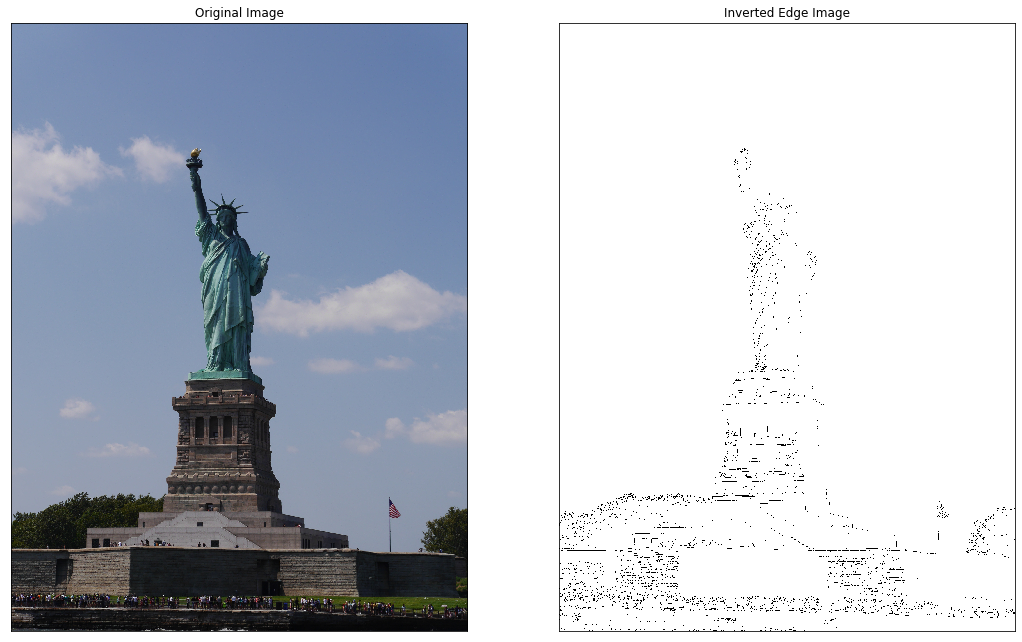

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
statue = cv2.imread("P1100010.JPG")
statue = cv2.cvtColor(statue, cv2.COLOR_BGR2RGB)
statue_edges = cv2.Canny(statue, 100, 200,   L2gradient = True)

statue_edges = cv2.bitwise_not(statue_edges)

fig_size = [18,12]
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(121)
plt.imshow(statue,cmap = 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(statue_edges,cmap = 'gray')
plt.title('Inverted Edge Image')
plt.xticks([]), plt.yticks([])

***Example 5: Face***

--2019-11-20 09:14:24--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/face1.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6521344 (6.2M) [application/octet-stream]
Saving to: ‘face1.JPG.2’

face1.JPG.2         100%[===================>]   6.22M  --.-KB/s    in 0.1s    

2019-11-20 09:14:24 (63.7 MB/s) - ‘face1.JPG.2’ saved [6521344/6521344]



(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

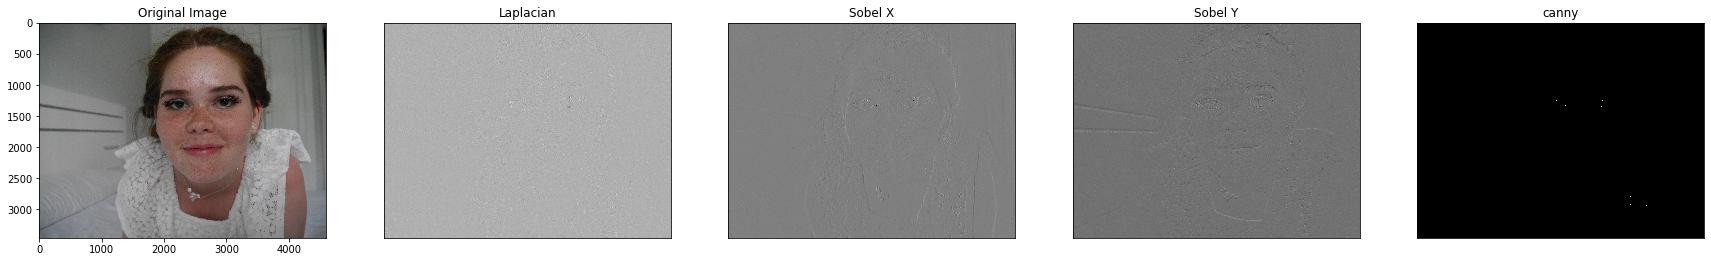

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/face1.JPG
face1 = cv2.imread("face1.JPG")
face1 = cv2.cvtColor(face1, cv2.COLOR_BGR2RGB)

face1_blur = cv2.GaussianBlur(face1, (3,3),0)

face1_gray = cv2.cvtColor(face1_blur, cv2.COLOR_BGR2GRAY)

laplacian = cv2.Laplacian(face1_gray,cv2.CV_64F, ksize=5)
sobelx = cv2.Sobel(face1_gray,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(face1_gray,cv2.CV_64F,0,1,ksize=3)  # y

canny = cv2.Canny(face1_gray,100,200)


fig_size = [36,30]
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(161)
plt.imshow(face1, cmap = 'gray')
plt.title('Original Image')
plt.subplot(162)
plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian')
plt.xticks([]), plt.yticks([])
plt.subplot(163)
plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel X')
plt.xticks([]), plt.yticks([])
plt.subplot(164)
plt.imshow(sobely, cmap = 'gray')
plt.title('Sobel Y')
plt.xticks([]), plt.yticks([])
plt.subplot(165)
plt.imshow(canny, cmap = 'gray')
plt.title('canny')
plt.xticks([]), plt.yticks([])

* reducing the colors of an image to a specific number
* using k-means(clustering algorthm)

***Example 1: Statue of Liberty***

# **Color replacing algorithm**

Use color quantization/k-means clustering to reduce the colors in the image

--2019-11-22 14:33:38--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19390 (19K) [image/jpeg]
Saving to: ‘Board-Game.jpeg’

Board-Game.jpeg     100%[===================>]  18.94K  --.-KB/s    in 0.007s  

2019-11-22 14:33:39 (2.81 MB/s) - ‘Board-Game.jpeg’ saved [19390/19390]

--2019-11-22 14:33:42--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awai

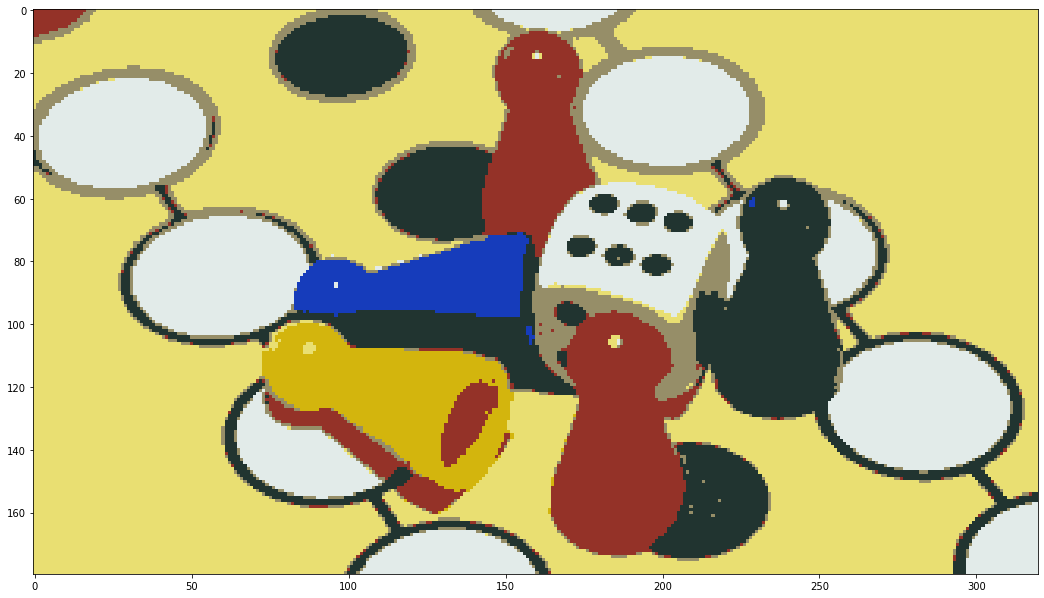

In [0]:
import numpy as np
import cv2
from skimage.transform import resize
from matplotlib import pyplot as plt

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/Board-Game.jpeg
game = cv2.imread("Board-Game.jpeg")

! wget https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-coloring-book/master/images/P1100010.JPG
statue = cv2.imread("P1100010.JPG")

img = cv2.cvtColor(game, cv2.COLOR_BGR2RGB)


#img = resize_image(img)
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 7
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
output = res.reshape((img.shape))

fig_size = [18,12]
plt.rcParams["figure.figsize"] = fig_size
plt.imshow(output)

Replace the colors with colors from the color set

In [0]:
def contains(list1, list2):
  for e in list1:
    if e[0] == list2[0] and e[1] == list2[1] and e[2] == list2[2]:
      return True
  return False



[  3 186 148  12  84]
[ 25  78 150  11 114]
[ 27 130 233  14 219]
[ 83  10 235   6 354]
[ 84  93  52   8 300]
[113 225 187  15 694]
[   25   239   211     0 10000]


(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

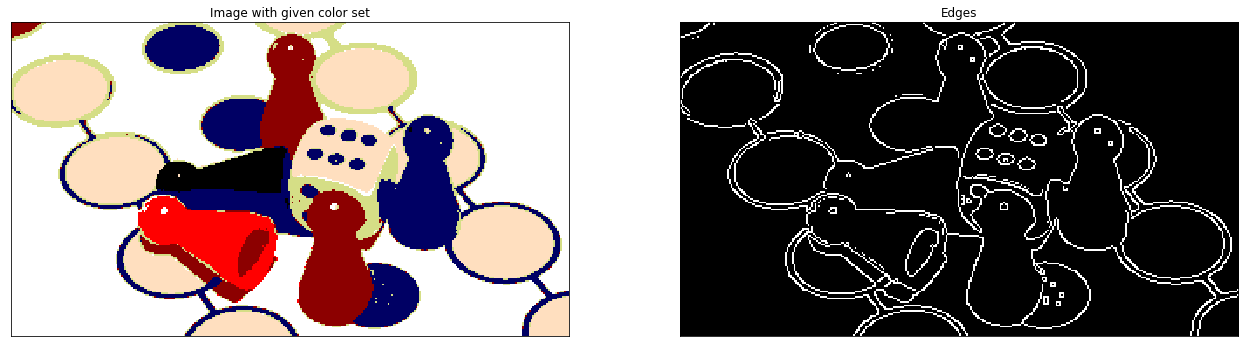

In [0]:
picture_colors = []
matched_to = []
used = []

hsv = cv2.cvtColor(output, cv2.COLOR_RGB2HSV)

h = hsv.shape[0]
w = hsv.shape[1]
# Get the colors in the picture
for y in range(0, h):
  for x in range(0, w):
    if not contains(picture_colors, hsv[y,x]):
      picture_colors.append(hsv[y,x])
for i in range(len(picture_colors)):
  picture_colors[i] = np.append(picture_colors[i],[0,10000])
  e = picture_colors[i]
  for j in range(0,len(color_set_hsv)):
    if j not in used:
      c = color_set_hsv[j]
      value = abs(2.5*(c[0] - e[0])) + abs(c[1] - e[1]) + abs(c[2] - e[2])
      if(value<e[4]):
        used.append(j)
        e[3] = j
        e[4] = value
final = hsv.copy()
for e in picture_colors:  
  print(e)  
  mask = cv2.inRange(hsv, e[0:3], e[0:3])
  final[mask > 0] = color_set_hsv[e[3]]
final = cv2.cvtColor(final, cv2.COLOR_HSV2RGB)
edges = cv2.cvtColor(final, cv2.COLOR_RGB2GRAY)

edges = cv2.Canny(edges, 50, 150,   L2gradient = True)
#edges = cv2.bitwise_not(edges)
fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size
plt.subplot(121)
plt.imshow(final)
plt.title('Image with given color set')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

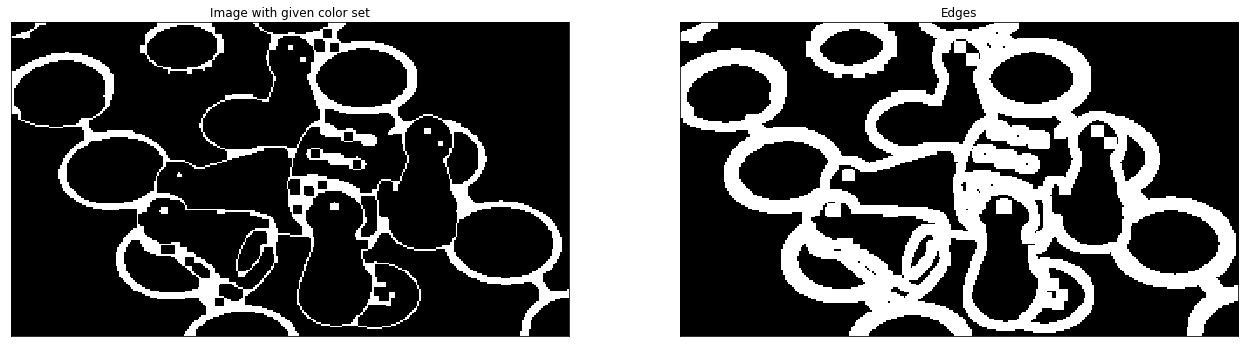

In [0]:
import cv2 as cv
import numpy as np

kernel_1 = np.ones((5,5),np.uint8)
kernel_2 = np.ones((3,3),np.uint8)
dilation = cv.dilate(edges,kernel_1,iterations = 1)
erosion = cv.erode(dilation,kernel_2,iterations = 2)
final = cv.dilate(erosion,kernel_1,iterations = 1)


plt.imshow(final, cmap = 'gray')
fig_size = [22,15]
plt.rcParams["figure.figsize"] = fig_size
plt.subplot(121)
plt.imshow(erosion,  cmap='gray')
plt.title('Image with given color set')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(final, cmap='gray')
plt.title('Edges')
plt.xticks([]), plt.yticks([])